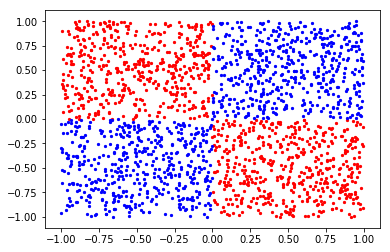

In [6]:
%matplotlib inline
from __future__ import division
import cvxopt, svmcmpl
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
COLORS = ['red', 'blue']
m = 2000
X = 2.0*cvxopt.uniform(m,2)-1.0
d = cvxopt.matrix([2*int(v>=0)-1 for v in cvxopt.mul(X[:,0],X[:,1])],(m,1))
def plot_data_with_labels(ax, x, y):
    unique = np.unique(y)
    for li in range(len(unique)):
        x_sub = x[y == unique[li]]
        ax.scatter(x_sub[:, 0], x_sub[:, 1], c = COLORS[li], s=5)
num_X = np.array(X)
num_d = np.array(d).squeeze()
plot_data_with_labels(ax,num_X,num_d)

In [7]:
gamma = 2.0; kernel = 'rbf'; sigma = 0.1; width = 20
sol1 = svmcmpl.softmargin(X, d, gamma, kernel, sigma)
# sol2 = svmcmpl.softmargin_appr(X, d, gamma, width, kernel, sigma)

building kernel matrix ..
     pcost       dcost       gap    pres   dres
 0: -2.9971e+02 -6.6865e+03  2e+04  1e+00  5e-15
 1: -2.0402e+02 -2.2382e+03  3e+03  1e-01  4e-15
 2: -2.0697e+02 -5.9910e+02  5e+02  2e-02  5e-15
 3: -2.5114e+02 -4.0953e+02  2e+02  5e-03  4e-15
 4: -2.7134e+02 -3.4647e+02  9e+01  2e-03  4e-15
 5: -2.8378e+02 -3.1352e+02  3e+01  4e-04  4e-15
 6: -2.9032e+02 -3.0135e+02  1e+01  5e-05  4e-15
 7: -2.9400e+02 -2.9598e+02  2e+00  2e-06  5e-15
 8: -2.9477e+02 -2.9508e+02  3e-01  1e-07  5e-15
 9: -2.9491e+02 -2.9492e+02  1e-02  2e-09  5e-15
10: -2.9492e+02 -2.9492e+02  2e-04  4e-11  5e-15
Optimal solution found.
utime = 3.190000, stime = 2.870000.
210 support vectors.
class 1: 8/1016 = 0.8% misclassified.
class 2: 13/984 = 1.3% misclassified.


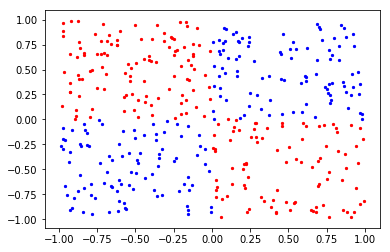

In [8]:
figt, axt = plt.subplots()
m_test = int(m*0.2)
X_test = 2.0*cvxopt.uniform(m_test,2)-1.0
d_test = cvxopt.matrix([2*int(v>=0)-1 for v in cvxopt.mul(X_test[:,0],X_test[:,1])],(m_test,1))
num_X_test = np.array(X_test)
num_d_test = np.array(d_test).squeeze()
plot_data_with_labels(axt,num_X_test,num_d_test)

In [9]:
y_hat = np.array(sol1['classifier'](X_test)).squeeze()
# num_right = np.sum(y_hat==np.array(d_test).squeeze())
# num_total = y_test.shape[0]
def evaluate(y_hat, y_test):
    num_right = np.sum(y_hat==y_test)
    num_total = y_test.shape[0]
    num_wrong = num_total - num_right
    top1accuracy = num_right/(num_total)
    top1error = num_wrong/num_total
    print "correct rate : ", num_right, "/", num_total
    print "top 1 accuracy", top1accuracy
    print "top 1 error", top1error
d_test_np = np.array(d_test).squeeze()
evaluate(y_hat,d_test_np)

correct rate :  395 / 400
top 1 accuracy 0.9875
top 1 error 0.0125


In [10]:
sigma = 1
rbf_temp = np.empty([m,m])
for i in range(m):
    for j in range(m):
        rbf_temp[i,j] = np.square(np.linalg.norm(num_X[i]-num_X[j]))
rbf_temp2 = -rbf_temp/np.square(sigma)
rbf_kernel = np.exp(rbf_temp2)